In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the data and spatial grid

In [68]:
f = h5py.File('./data/rsg1.hdf5', 'r')

with open('./data/grid1.pkl', 'rb') as grid:
    rg, tg, pg = pickle.load(grid) # r, theta, phi

In [69]:
i = 12
print(rg)
rg[50] - rg[49]

[ 302.1397   305.83344  309.5723   313.35687  317.18768  321.06534
  324.99042  328.9635   332.98514  337.05594  341.1765   345.3474
  349.56937  353.8429   358.1687   362.54736  366.97955  371.46594
  376.0072   380.60394  385.2569   389.96677  394.7342   399.55988
  404.44458  409.38898  414.39386  419.45987  424.58783  429.7785
  435.03262  440.35098  445.73438  451.1836   456.69937  462.28262
  467.9341   473.65466  479.44522  485.30652  491.2395   497.245
  503.3239   509.47717  515.7056   522.0102   528.3919   534.8516
  541.39026  548.00885  554.7084   561.4898   568.3541   575.3024
  582.33563  589.4548   596.66095  603.95526  611.33875  618.8125
  626.3776   634.0352   641.78644  649.6324   657.5743   665.6133
  673.75055  681.98724  690.3247   698.76416  707.3067   715.9536
  724.70636  733.56604  742.53406  751.6117   760.8003   770.10126
  779.5159   789.0457   798.692    808.4562   818.3398   828.3442
  838.4709   848.7214   859.09717  869.5998   880.23083  890.9919
  901.

6.699524

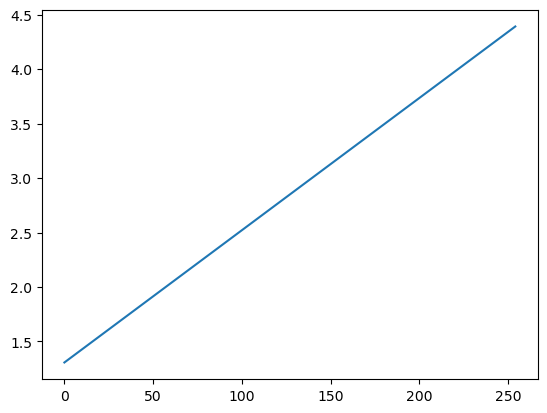

In [28]:
#plot the spacing in rg:
plt.plot(np.log(rg[1:]- rg[:-1]))


In [66]:
np.log(6700)

8.809862805379057

In [67]:
rg[-1]

6697.052

# Plot slices of a few different variables at a few different radii

Each slice shows $\phi$ vs $\cos(\theta)$. Each column is at a fixed radius, and each row represents a different variable.

Text(0.02, 0.5, '$\\cos(\\theta)$')

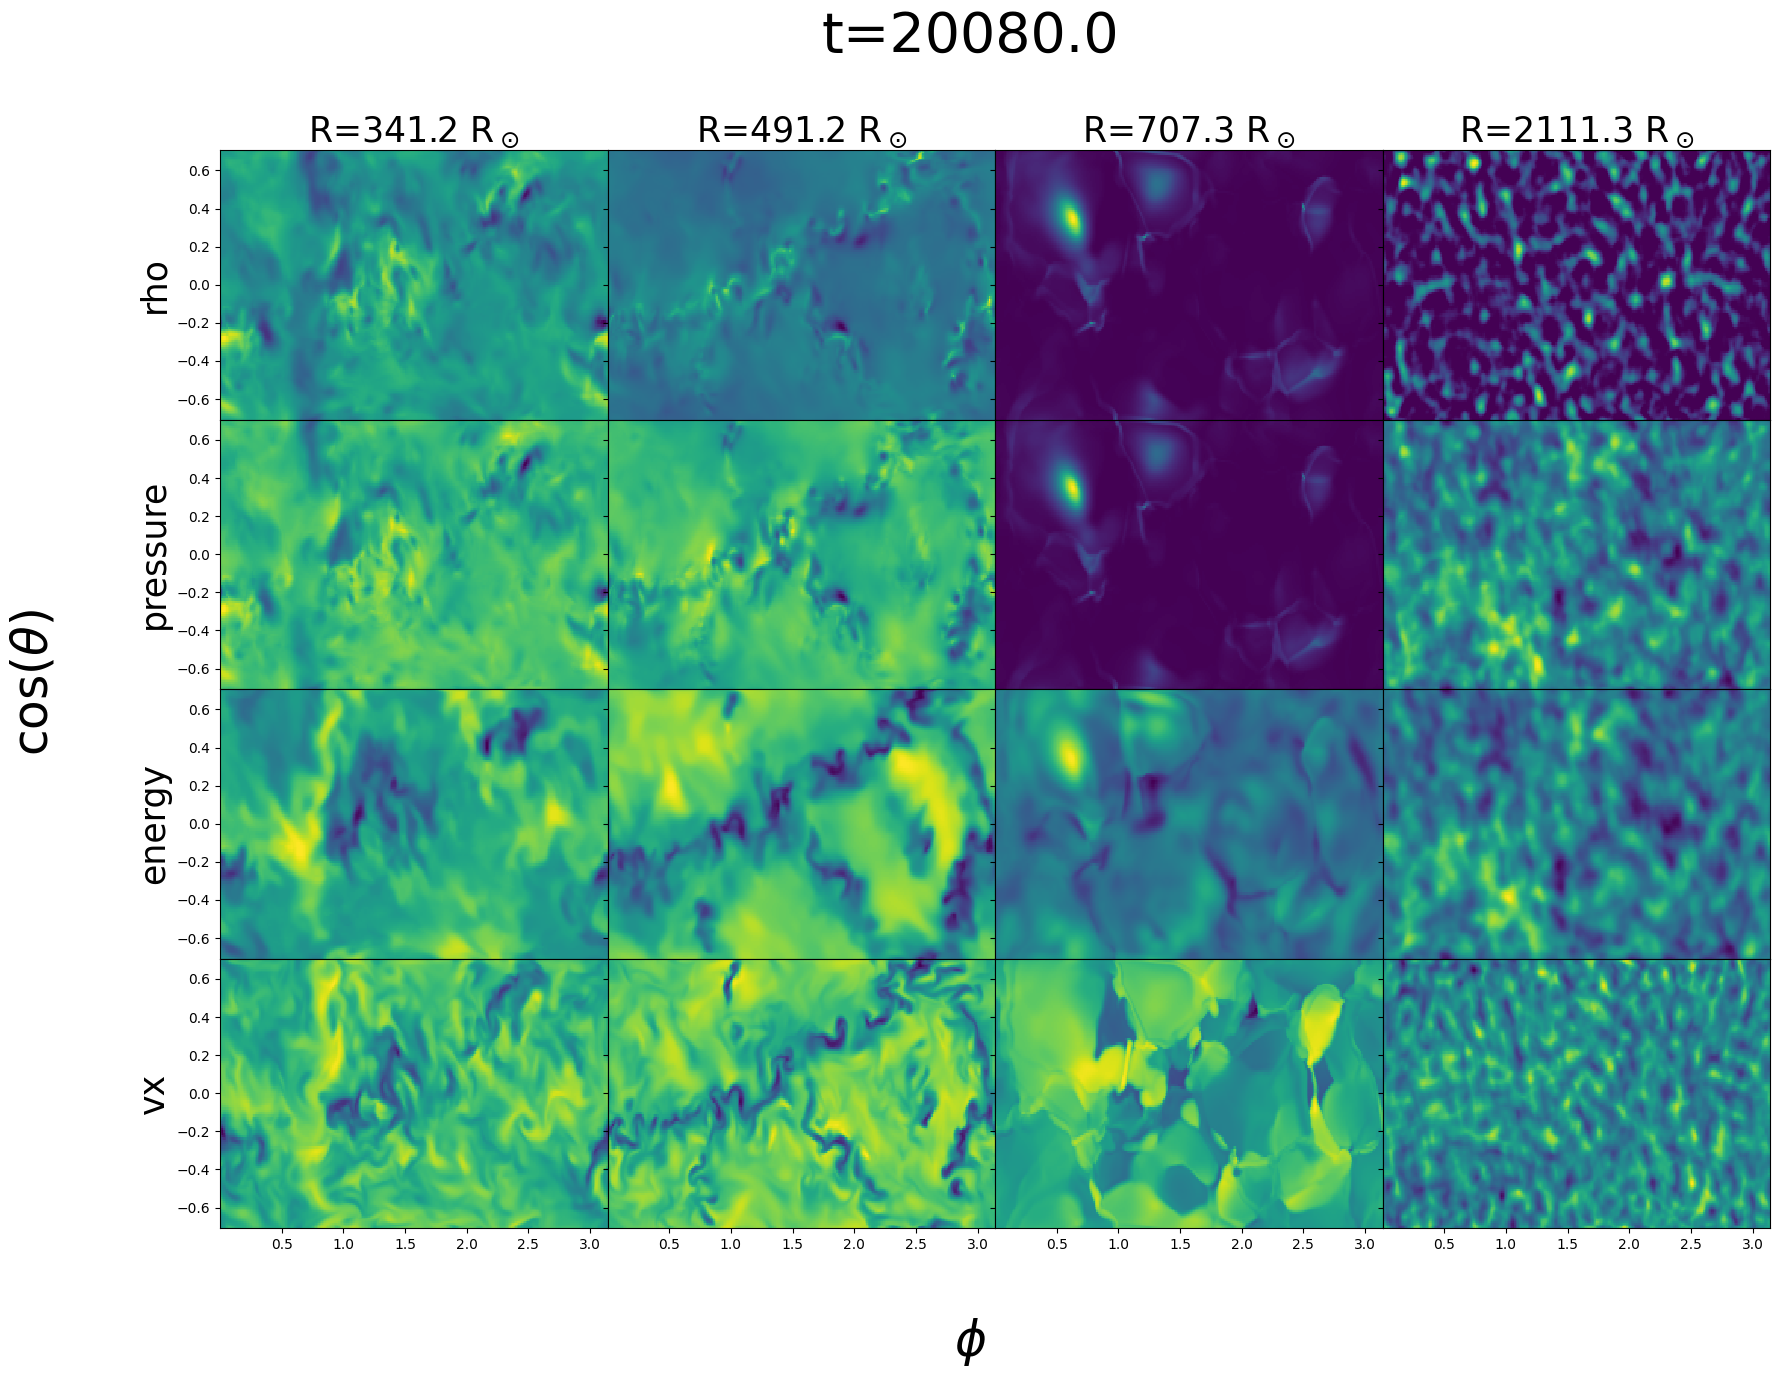

In [30]:

keys = ['rho', 'pressure', 'energy', 'vx']
ridx = [10, 40, 70, 160] # radius indices
tidx = 20 # time index

fig, ax = plt.subplots(4, 4, figsize=(20, 14), sharex=True, sharey=True, gridspec_kw=dict(hspace=0, wspace=0))

pcms = []

for i in range(4):
    _pcms = []
    for j in range(4):
        pcm = ax[i,j].pcolormesh(pg, np.cos(tg), f[keys[i]][tidx,ridx[j],:,:], rasterized=True)
        _pcms.append(pcm)
    pcms.append(_pcms)

for i in range(4):
    ax[i,0].set_ylabel(keys[i], fontsize=25)

for j in range(4):
    ax[0,j].set_title(f"R={rg[ridx[j]]:.1f} R$_\odot$", fontsize=25)
    
title = fig.suptitle(f"t={f['time'][tidx]:.1f}", fontsize=40)
fig.supxlabel('$\phi$', fontsize=35)
fig.supylabel('$\cos(\\theta)$', fontsize=35)

In [29]:
import numpy as np
import h5py
import glob
import os
import matplotlib.pyplot as plt
paths = sorted(glob.glob('data/*.hdf5'))
print(paths)

['data/rsg1.hdf5', 'data/rsg2.hdf5']


In [57]:
p = paths[1]
t = 2000
with h5py.File(p,'r') as f:
    d = f['rho'][t]

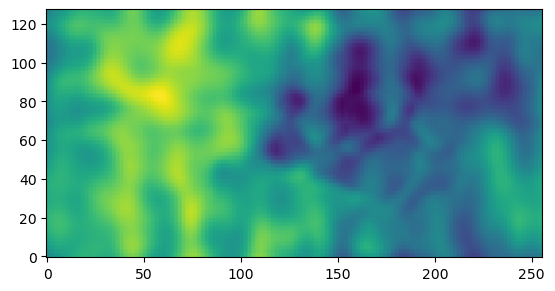

In [58]:
plt.imshow(d[200,:,:], origin='lower')

In [65]:
r = 200
d[r,100,-1] - d[r,100,0]

-2.8315128e-12